# Cropping Thomas's examples

## Crop system

<class 'numpy.ndarray'>
Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
cropping2d_2 (Cropping2D)    (None, 18, 18, 1)         0         
Total params: 0
Trainable params: 0
Non-trainable params: 0
_________________________________________________________________


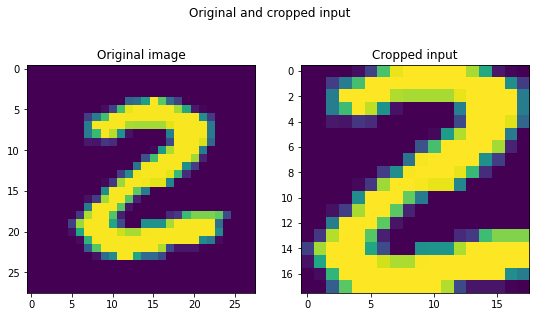

In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Cropping2D
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt
import numpy as np

# Load MNIST data
(x_train, y_train), (x_test, y_test) = mnist.load_data()
input_image_shape = (28, 28, 1)
input_image = x_train[25].reshape(input_image_shape)

# Create the model
model = Sequential()
model.add(Cropping2D(cropping=((5, 5), (5, 5)), input_shape=input_image_shape))
model.summary()

# Perform actual cropping
model_inputs = np.array([input_image])
outputs_cropped = model.predict(model_inputs)

# Get output
outputs_cropped = outputs_cropped[0]

# Visualize input and output
fig, axes = plt.subplots(1, 2)
axes[0].imshow(input_image[:, :, 0]) 
axes[0].set_title('Original image')
axes[1].imshow(outputs_cropped[:, :, 0])
axes[1].set_title('Cropped input')
fig.suptitle(f'Original and cropped input')
fig.set_size_inches(9, 5, forward=True)
plt.show()

## Training a ConvNet with Cropping2D inputs

In [6]:
import tensorflow
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Cropping2D

# Model configuration
img_width, img_height = 28, 28
batch_size = 250
no_epochs = 25
no_classes = 10
validation_split = 0.2
verbosity = 1

# Load MNIST dataset
(input_train, target_train), (input_test, target_test) = mnist.load_data()

# Reshape data
input_train = input_train.reshape(input_train.shape[0], img_width, img_height, 1)
input_test = input_test.reshape(input_test.shape[0], img_width, img_height, 1)
input_shape = (img_width, img_height, 1)

# Parse numbers as floats
input_train = input_train.astype('float32')
input_test = input_test.astype('float32')

# Normalize data
input_train = input_train / 255
input_test = input_test / 255

# Convert target vectors to categorical targets
target_train = tensorflow.keras.utils.to_categorical(target_train, no_classes)
target_test = tensorflow.keras.utils.to_categorical(target_test, no_classes)

# Create the model
model = Sequential()
model.add(Cropping2D(cropping=((5, 5), (5, 5)), input_shape=input_shape))
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(no_classes, activation='softmax'))

# Compile the model
model.compile(loss=tensorflow.keras.losses.categorical_crossentropy,
              optimizer=tensorflow.keras.optimizers.Adam(),
              metrics=['accuracy'])

# Fit data to model
history = model.fit(input_train, target_train,
            batch_size=batch_size,
            epochs=no_epochs,
            verbose=verbosity,
            validation_split=validation_split)

# Generate generalization metrics
score = model.evaluate(input_test, target_test, verbose=0)
print(f'Test loss: {score[0]} / Test accuracy: {score[1]}')

Epoch 1/25
192/192 [==============================] - 12s 60ms/step - loss: 0.4876 - accuracy: 0.8555 - val_loss: 0.1296 - val_accuracy: 0.9636
Epoch 2/25
192/192 [==============================] - 12s 61ms/step - loss: 0.1506 - accuracy: 0.9543 - val_loss: 0.0907 - val_accuracy: 0.9732
Epoch 3/25
192/192 [==============================] - 12s 63ms/step - loss: 0.1141 - accuracy: 0.9650 - val_loss: 0.0689 - val_accuracy: 0.9790
Epoch 4/25
192/192 [==============================] - 14s 71ms/step - loss: 0.0903 - accuracy: 0.9722 - val_loss: 0.0613 - val_accuracy: 0.9818
Epoch 5/25
192/192 [==============================] - 13s 70ms/step - loss: 0.0801 - accuracy: 0.9755 - val_loss: 0.0564 - val_accuracy: 0.9836
Epoch 6/25
192/192 [==============================] - 14s 73ms/step - loss: 0.0690 - accuracy: 0.9786 - val_loss: 0.0539 - val_accuracy: 0.9847
Epoch 7/25
192/192 [==============================] - 14s 73ms/step - loss: 0.0641 - accuracy: 0.9798 - val_loss: 0.0497 - val_accuracy:

# Padding

<class 'PIL.JpegImagePlugin.JpegImageFile'>
(500, 400)
RGB
<class 'numpy.ndarray'>
(400, 500, 3)


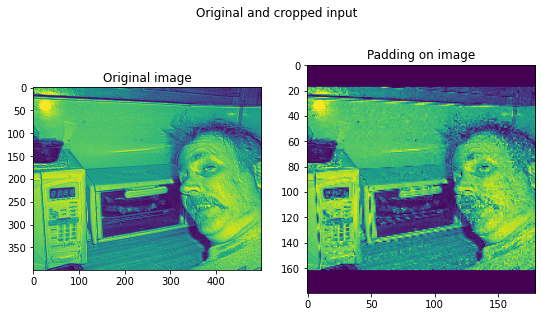

In [46]:
import tensorflow as tf
from tensorflow import pad
from tensorflow.keras.layers import Layer
from tensorflow.keras.models import Sequential

# load and show an image with Pillow
from PIL import Image
from numpy import asarray

# Open the image form working directory
img = Image.open('photo_test.jpg')
# summarize some details about the image
print(type(img))
print(img.size)
print(img.mode)


# asarray() class is used to convert
# PIL images into NumPy arrays
numpydata = asarray(img)
  
# <class 'numpy.ndarray'>
print(type(numpydata))
  
#  shape
print(numpydata.shape)

input_image = tf.image.resize_with_pad(numpydata, 180, 180)

fig, axes = plt.subplots(1, 2)
axes[0].imshow(numpydata[:, :, 0])
axes[0].set_title('Original image')
axes[1].imshow(input_image[:, :, 0]) 
axes[1].set_title('Padding on image')
fig.suptitle(f'Original and cropped input')
fig.set_size_inches(9, 5, forward=True)
plt.show()

# Crop or Pad

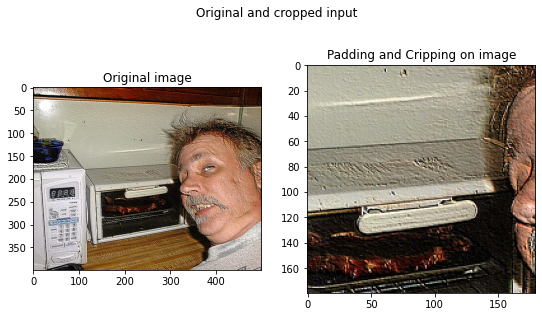

In [48]:
input_image = tf.image.resize_with_crop_or_pad(numpydata, 180, 180)

fig, axes = plt.subplots(1, 2)
axes[0].imshow(numpydata[:, :, :])
axes[0].set_title('Original image')
axes[1].imshow(input_image[:, :, :]) 
axes[1].set_title('Padding and Cripping on image')
fig.suptitle(f'Original and cropped input')
fig.set_size_inches(9, 5, forward=True)
plt.show()